In [34]:
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns

In [57]:
primary_logfold = pd.read_csv("data/primary-screen-replicate-collapsed-logfold-change.csv")
#primary_logfold.rename({'Unnamed: 0': "cell_line"}, axis=1, inplace=True)

In [58]:
print(f"The primary logfold data has shape: {primary_logfold.shape}")
primary_logfold

The primary logfold data has shape: (578, 4687)


,Unnamed: 0,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
0,ACH-000001,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
1,ACH-000007,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
2,ACH-000008,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
3,ACH-000010_FAILED_STR,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,NaN,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
4,ACH-000011,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,ACH-001239,0.059884,-0.157487,0.030140,0.386968,-1.153988,0.288633,0.690595,-0.200998,-0.796406,...,0.678526,0.255822,-0.063099,-0.326424,0.038239,0.140408,-0.378572,0.732354,-1.350145,0.040768
574,ACH-001306,0.159443,-0.156117,0.480380,0.166258,-0.693029,0.334972,0.151108,0.025708,-0.811637,...,0.099624,-0.182114,0.181292,-0.279778,-0.643322,-0.085378,-0.158069,-0.105751,-4.515821,-0.209708
575,ACH-001307,-0.544829,-0.954725,0.695190,0.662730,-0.603988,-0.014424,0.578712,-1.467946,-0.435459,...,0.071582,0.067035,-0.329940,-0.505103,0.066395,0.275095,-0.024510,-0.237596,-2.839291,-0.391083
576,ACH-001318,-0.012480,-0.065810,0.249521,-0.251258,-0.170861,-0.325158,-0.303747,-1.378993,-0.941142,...,-0.085051,-0.108433,0.865502,-0.469116,-0.143382,0.017683,-0.789759,-0.138915,-3.213087,0.159432


In [59]:

class PrimaryLogfold:

    def __init__(self, dir: str, genes_as_features: bool = True, nan_strategy: str = "mean") -> None:

        self.path = Path(dir) / "primary-screen-replicate-collapsed-logfold-change.csv"
        self.genes_as_features = genes_as_features
        self.nan_strategy = nan_strategy

        self.data = self.read_data(self.genes_as_features, self.nan_strategy)

    def read_data(self, genes_as_features: bool, nan_strategy: str):
        data = pd.read_csv(self.path)

        if nan_strategy == "mean":
            data = data.fillna(data.mean())
        elif nan_strategy == "drop":
            data = data.dropna(axis=1)

        if genes_as_features:
            data = data.transpose()
            data.rename({'Unnamed: 0': "drug_name"}, inplace=True)
            
        else:
            data.rename({'Unnamed: 0': "cell_line"}, inplace=True)

        return data



    

        

In [60]:
primary = PrimaryLogfold(dir="data", genes_as_features=True)

/tmp/ipykernel_41311/3346971112.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [61]:
primary.data

,0,1,2,3,4,5,6,7,8,9,...,568,569,570,571,572,573,574,575,576,577
drug_name,ACH-000001,ACH-000007,ACH-000008,ACH-000010_FAILED_STR,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000018,...,ACH-001200,ACH-001205,ACH-001210,ACH-001211,ACH-001212,ACH-001239,ACH-001306,ACH-001307,ACH-001318,ACH-001321
BRD-A00077618-236-07-6::2.5::HTS,-0.015577,-0.09573,0.37948,0.11889,0.145346,0.103348,0.35301,0.128302,0.166727,0.831733,...,0.323892,0.338311,0.637148,0.574641,1.245597,0.059884,0.159443,-0.544829,-0.01248,-0.269815
BRD-A00100033-001-08-9::2.5::HTS,-0.449332,0.257943,-0.596132,-0.231615,-0.499274,0.06387,0.038872,-0.516359,0.224048,-0.491812,...,-0.170384,-0.484385,0.660825,0.432232,-0.074884,-0.157487,-0.156117,-0.954725,-0.06581,-0.139671
BRD-A00147595-001-01-5::2.5::HTS,0.489379,0.772349,0.548056,0.621937,0.26747,0.08867,0.389884,0.19535,0.707707,0.157091,...,0.660664,-0.29243,1.329102,-0.036033,0.126575,0.03014,0.48038,0.69519,0.249521,0.169287
BRD-A00218260-001-03-4::2.5::HTS,0.206675,-0.438502,0.422269,-0.202707,0.157804,0.484581,-0.112096,0.242858,0.357244,0.371927,...,0.223016,0.025905,0.584948,0.33423,-0.347024,0.386968,0.166258,0.66273,-0.251258,0.408545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRD-K99506538-001-03-8::2.5::MTS004,0.399233,0.212031,-0.036088,0.218158,0.447482,0.182206,0.375425,0.166262,-0.52707,-0.037943,...,-0.171443,0.017344,-0.594348,-0.185357,0.077914,0.140408,-0.085378,0.275095,0.017683,-0.05208
BRD-K99616396-001-05-1::2.499991421::MTS004,-0.127658,0.349225,0.158071,-0.411009,0.16462,0.042021,0.219192,-0.072067,-0.351383,-0.08099,...,-0.49924,0.305851,-1.097323,0.115126,0.358504,-0.378572,-0.158069,-0.02451,-0.789759,-0.018666
BRD-K99879819-001-02-1::2.5187366::MTS004,-0.141651,-0.387439,0.171043,-0.18154,-0.565251,-0.269705,0.695862,0.109063,-0.327923,0.003768,...,-0.068331,-0.804844,-0.045715,0.12048,0.024189,0.732354,-0.105751,-0.237596,-0.138915,-0.096862
BRD-K99919177-001-01-3::2.5::MTS004,-1.153652,-0.831461,-3.94709,-3.010225,-4.110627,-3.396992,-1.680226,-3.533984,-1.691159,-2.258702,...,-1.285662,-2.883868,-1.978564,-2.032993,-1.47795,-1.350145,-4.515821,-2.839291,-3.213087,-1.415958


In [6]:
cell_line = pd.read_csv("data/primary-screen-cell-line-info.csv")
cell_line.head(10)

,row_name,depmap_id,ccle_name,primary_tissue,secondary_tissue,tertiary_tissue,passed_str_profiling,str_profiling_notes,originally_assigned_depmap_id,originally_assigned_ccle_name
0,ACH-000824,ACH-000824,KYSE510_OESOPHAGUS,esophagus,esophagus_squamous,NaN,True,NaN,NaN,NaN
1,ACH-000954,ACH-000954,HEC1A_ENDOMETRIUM,uterus,uterus_endometrium,NaN,True,NaN,NaN,NaN
2,ACH-000601,ACH-000601,MIAPACA2_PANCREAS,pancreas,NaN,NaN,True,NaN,NaN,NaN
3,ACH-000651,ACH-000651,SW620_LARGE_INTESTINE,colorectal,NaN,NaN,True,NaN,NaN,NaN
4,ACH-000361,ACH-000361,SKHEP1_LIVER,liver,NaN,NaN,True,NaN,NaN,NaN
5,ACH-000842,ACH-000842,SW480_LARGE_INTESTINE,colorectal,NaN,NaN,True,NaN,NaN,NaN
6,ACH-000570,ACH-000570,YKG1_CENTRAL_NERVOUS_SYSTEM,central_nervous_system,glioma,glioblastoma,True,NaN,NaN,NaN
7,ACH-000396,ACH-000396,J82_URINARY_TRACT,urinary_tract,NaN,NaN,True,NaN,NaN,NaN
8,ACH-000777,ACH-000777,KYSE30_OESOPHAGUS,esophagus,esophagus_squamous,NaN,True,NaN,NaN,NaN
9,ACH-000924,ACH-000924,NCIH2172_LUNG,lung,lung_NSC,NaN,True,NaN,NaN,NaN


In [7]:
treatment_info = pd.read_csv("data/primary-screen-replicate-collapsed-treatment-info.csv")
treatment_info.head(10)

,column_name,broad_id,name,dose,screen_id,moa,target,disease.area,indication,smiles,phase
0,BRD-A00055058-001-01-0::2.325889319::MTS004,BRD-A00055058-001-01-0,RS-0481,2.325889,MTS004,immunostimulant,NaN,NaN,NaN,CC(NC(=O)C1CSCN1C(=O)c1ccccc1)c1ccccc1,Phase 2
1,BRD-A00842753-001-01-9::2.5::MTS004,BRD-A00842753-001-01-9,oleuropein,2.500000,MTS004,estrogen receptor agonist,GPER1,NaN,NaN,COC(=O)C1=COC(OC2OC(CO)C(O)C(O)C2O)\C(=C/C)C1C...,Phase 2
2,BRD-A02232681-001-01-8::2.5::MTS004,BRD-A02232681-001-01-8,isoleucine,2.500000,MTS004,NaN,"ACADSB, BCAT1, BCAT2, IARS, IARS2",NaN,NaN,CCC(C)C(N)C(O)=O,Launched
3,BRD-A04447196-001-01-8::2.5::MTS004,BRD-A04447196-001-01-8,gepefrine,2.500000,MTS004,adrenergic receptor agonist,NaN,cardiology,hypotension,CC(N)Cc1cccc(O)c1,Launched
4,BRD-A04971881-003-01-3::2.65294603::MTS004,BRD-A04971881-003-01-3,cloranolol,2.652946,MTS004,adrenergic receptor antagonist,"ADRB1, ADRB2, ADRB3",NaN,NaN,CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl,Launched
5,BRD-A08316590-001-01-3::2.5::MTS004,BRD-A08316590-001-01-3,broxaterol,2.500000,MTS004,adrenergic receptor agonist,ADRB2,NaN,NaN,CC(C)(C)NCC(O)c1cc(Br)no1,Phase 3
6,BRD-A08772153-001-02-4::2.500028879::MTS004,BRD-A08772153-001-02-4,SQ-109,2.500029,MTS004,bacterial cell wall synthesis inhibitor,FDFT1,NaN,NaN,CC(C)=CCC\C(C)=C\CNCCNC1[C@H]2C[C@@H]3C[C@@H](...,Phase 3
7,BRD-A09911125-001-01-4::2.5::MTS004,BRD-A09911125-001-01-4,prolylleucylglycinamide,2.500000,MTS004,melanocyte-stimulating hormone release inhibitor,NaN,NaN,NaN,CC(C)CC(NC(=O)C1CCCN1)C(=O)NCC(N)=O,Phase 2
8,BRD-A10188456-001-04-9::2.5::MTS004,BRD-A10188456-001-04-9,dexamethasone,2.500000,MTS004,glucocorticoid receptor agonist,"ANXA1, NOS2, NR0B1, NR3C1, NR3C2","endocrinology, rheumatology, allergy, gastroen...","hypercalcemia, rheumatoid arthritis, psoriatic...",C[C@@H]1CC2C3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C...,Launched
9,BRD-A10773072-001-03-4::2.496712929::MTS004,BRD-A10773072-001-03-4,glycerol-monolaurate,2.496713,MTS004,beta lactamase inhibitor,NaN,NaN,NaN,CCCCCCCCCCCC(=O)OCC(O)CO,Launched


In [23]:
def parse_logfold_colname(column: str) -> tuple[str, str, str]:
    name, concentration, screen_type = column.split("::")
    
    return name, concentration, screen_type

def plot_response_historgram(series: pd.Series):
    name, concetration, screen_type = parse_logfold_colname(series.name)

    ax = sns.histplot(data=series, kde=True)
    ax.set_title(f"Name: {name} \n Concentration: {concetration} \n Screen Type: {screen_type}")

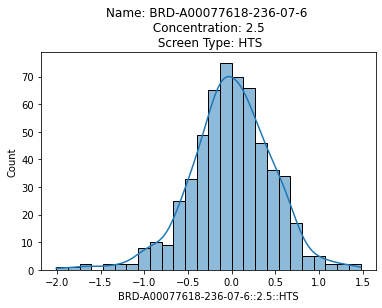

In [24]:
plot_response_historgram(primary_logfold["BRD-A00077618-236-07-6::2.5::HTS"])

In [10]:
cols = primary_logfold.columns
parsed_cols = [parse_logfold_colname(x) for x in cols[1:]]

In [12]:
sample_series = primary_logfold["BRD-A00077618-236-07-6::2.5::HTS"]
sample_series.name


'BRD-A00077618-236-07-6::2.5::HTS'

In [13]:
max([x[1] for x in parsed_cols])

'5.6'

In [17]:
parsed_cols

[('BRD-A00077618-236-07-6', '2.5', 'HTS'),
 ('BRD-A00100033-001-08-9', '2.5', 'HTS'),
 ('BRD-A00147595-001-01-5', '2.5', 'HTS'),
 ('BRD-A00218260-001-03-4', '2.5', 'HTS'),
 ('BRD-A00376169-001-01-6', '2.5', 'HTS'),
 ('BRD-A00520476-001-07-4', '2.5', 'HTS'),
 ('BRD-A00546892-001-02-6', '2.5', 'HTS'),
 ('BRD-A00578795-001-04-3', '2.5', 'HTS'),
 ('BRD-A00758722-001-04-9', '2.5', 'HTS'),
 ('BRD-A00827783-001-24-6', '2.5', 'HTS'),
 ('BRD-A00993607-003-24-6', '2.5', 'HTS'),
 ('BRD-A01098288-001-02-9', '2.5', 'HTS'),
 ('BRD-A01412266-001-01-0', '2.5', 'HTS'),
 ('BRD-A01493904-003-12-1', '2.5', 'HTS'),
 ('BRD-A01563671-001-02-7', '2.5', 'HTS'),
 ('BRD-A01593789-001-03-1', '2.5', 'HTS'),
 ('BRD-A01636364-003-15-1', '2.5', 'HTS'),
 ('BRD-A01643550-001-04-9', '2.5', 'HTS'),
 ('BRD-A01787639-003-16-9', '2.5', 'HTS'),
 ('BRD-A01907367-001-01-7', '2.5', 'HTS'),
 ('BRD-A02006392-001-16-4', '2.5', 'HTS'),
 ('BRD-A02180903-001-04-5', '2.5', 'HTS'),
 ('BRD-A02710418-003-11-8', '2.5', 'HTS'),
 ('BRD-A027